In [5]:
import pandas as pd
from scratch.datasets.kanggle import KanggleDatasets

datasets = KanggleDatasets()
dataframe = pd.read_csv(datasets.social_network_ads.social_network_ads_csv)

In [6]:
X = dataframe[['Age', 'EstimatedSalary']]
X.insert(0, 'Constant', 1.0)
y = dataframe['Purchased']

In [ ]:
xs = X.values.tolist()
ys = y.tolist()

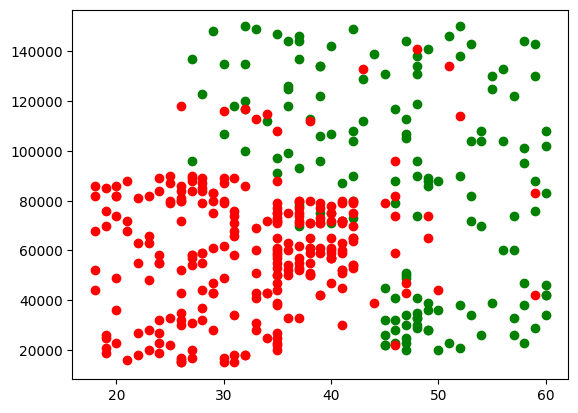

In [8]:
import matplotlib.pyplot as plt


hired = dataframe[dataframe['Purchased'] == 1]
not_hired = dataframe[dataframe['Purchased'] == 0]

ax, fig = plt.subplots()
fig.scatter(hired['Age'], hired['EstimatedSalary'], color='green')
fig.scatter(not_hired['Age'], not_hired['EstimatedSalary'], color='red')
plt.show()

least squares fit: 100%|██████████| 1000/1000 [00:01<00:00, 763.87it/s]


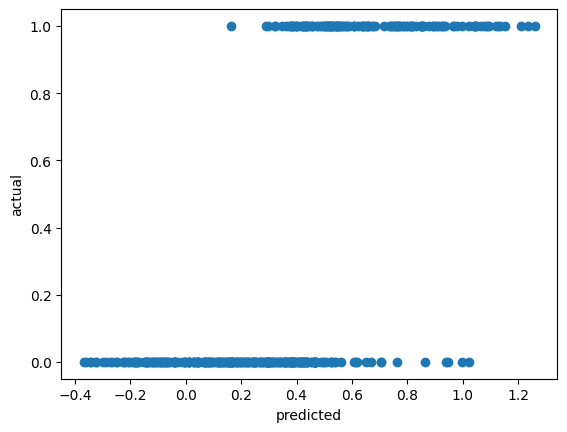

In [ ]:
from matplotlib import pyplot as plt
from scratch.working_with_data import rescale
from scratch.multiple_regression import least_squares_fit, predict
from scratch.gradient_descent import gradient_step

learning_rate = 0.001 
rescaled_xs = rescale(xs)
beta = least_squares_fit(rescaled_xs, ys, learning_rate, 1000, 1) 
predictions = [predict(x_i, beta) for x_i in rescaled_xs] 
 
plt.scatter(predictions, ys) 
plt.xlabel("predicted") 
plt.ylabel("actual") 
plt.show()


In [10]:
import math

def logistic(x: float) -> float:
    return 1.0 / (1 + math.exp(-x))

In [11]:
def logistic_prime(x: float) -> float:
    y = logistic(x)
    return y * (1 - y)

In [12]:
from scratch.linear_algebra import Vector, dot

def _negative_log_likelihood(x: Vector, y: float, beta: Vector) -> float: 
    if y == 1: 
        return -math.log(logistic(dot(x, beta))) 
    else: 
        return -math.log(1 - logistic(dot(x, beta)))

In [13]:
from typing import List

def negative_log_likelihood(
    xs: List[Vector], 
    ys: List[float], 
    beta: Vector
) -> float: 
    return sum(_negative_log_likelihood(
        x, y, beta) for x, y in zip(xs, ys))

In [14]:
from scratch.linear_algebra import vector_sum 
 
def _negative_log_partial_j(x: Vector, y: float, beta: Vector, j: int) -> float: 
    """ 
    The jth partial derivative for one data point. 
    Here i is the index of the data point. 
    """ 
    return -(y - logistic(dot(x, beta))) * x[j] 
 
def _negative_log_gradient(x: Vector, y: float, beta: Vector) -> Vector: 
    """ 
    The gradient for one data point. 
    """ 
    return [_negative_log_partial_j(x, y, beta, j) 
            for j in range(len(beta))] 
 
def negative_log_gradient(
    xs: List[Vector], 
    ys: List[float], 
    beta: Vector
) -> Vector: 
    return vector_sum([
        _negative_log_gradient(x, y, beta) 
        for x, y in zip(xs, ys)
    ])

In [15]:
import random
import tqdm
from scratch.machine_learning import train_test_split

random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(rescaled_xs, ys, 0.33)

learning_rate = 0.01

beta = [random.random() for _ in range(3)] 
 
with tqdm.trange(5000) as t: 
    for epoch in t: 
        gradient = negative_log_gradient(x_train, y_train, beta) 
        beta = gradient_step(beta, gradient, -learning_rate) 
        loss = negative_log_likelihood(x_train, y_train, beta) 
        t.set_description(f"loss: {loss:.3f} beta: {beta}")

loss: 94.684 beta: [-1.226466704460298, 2.3846799070765488, 0.9555859372637482]: 100%|██████████| 5000/5000 [00:07<00:00, 686.22it/s]


In [17]:
from scratch.working_with_data import scale

means, stdevs = scale(xs) 
beta_unscaled = [(beta[0] 
                  - beta[1] * means[1] / stdevs[1] 
                  - beta[2] * means[2] / stdevs[2]), 
                 beta[1] / stdevs[1], 
                 beta[2] / stdevs[2]]
beta_unscaled

[-11.746923983550127, 0.22748335201131276, 2.8025546246604956e-05]

In [21]:
true_positives = false_positives = true_negatives = false_negatives = 0 
 
for x_i, y_i in zip(x_test, y_test): 
    prediction = logistic(dot(beta, x_i)) 
 
    if y_i == 1 and prediction >= 0.5:  # TP: paid and we predict paid 
        true_positives += 1 
    elif y_i == 1:                      # FN: paid and we predict unpaid 
        false_negatives += 1 
    elif prediction >= 0.5:             # FP: unpaid and we predict paid 
        false_positives += 1 
    else:                               # TN: unpaid and we predict unpaid 
        true_negatives += 1 
 
precision = true_positives / (true_positives + false_positives) 
recall = true_positives / (true_positives + false_negatives)
print(f"precision: {precision * 100:.2f}% recall: {recall * 100:.2f}%")

precision: 90.24% recall: 69.81%
